In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 17.1 MB/s eta 0:00:00
     ------------------------------------- 965.4/965.4 kB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 164.1/164.1 kB ? eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 17.5 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
tipsData = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

In [13]:
tipsData.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
tipsData.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [14]:
tipsData.isnull().sum() #isnull boolean, .sum adds up all the trues

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [15]:
tipsData.groupby(["day"]).count() #referencing a label []
#grouping by days - how much tip per day
#counting how many values there are per day and not the actual data values themselves

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


In [17]:
tipsData.groupby(["day"]).sum()
#auto sums only numeric columns

C:\Users\yvoyw\AppData\Local\Temp\ipykernel_11856\750939180.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tipsData.groupby(["day"]).sum()


,total_bill,tip,size
day,,,
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216
Thur,1096.33,171.83,152


In [18]:
tipsPc = 100 * tipsData.groupby(["day"]).sum()["tip"] / tipsData.groupby(["day"]).sum()["total_bill"]
#percentage of tips the total bill corresponds to each day

C:\Users\yvoyw\AppData\Local\Temp\ipykernel_11856\3193418838.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tipsPc = 100 * tipsData.groupby(["day"]).sum()["tip"] / tipsData.groupby(["day"]).sum()["total_bill"]
C:\Users\yvoyw\AppData\Local\Temp\ipykernel_11856\3193418838.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tipsPc = 100 * tipsData.groupby(["day"]).sum()["tip"] / tipsData.groupby(["day"]).sum()["total_bill"]


In [19]:
tipsPc 
#a series ie more than one value

day
Fri     15.944519
Sat     14.642375
Sun     15.203791
Thur    15.673201
dtype: float64

In [20]:
#to convert to a df
tipsPc = tipsPc.to_frame("tip(%)").reset_index()
tipsPc

,day,tip(%)
0,Fri,15.944519
1,Sat,14.642375
2,Sun,15.203791
3,Thur,15.673201


<AxesSubplot: xlabel='day'>

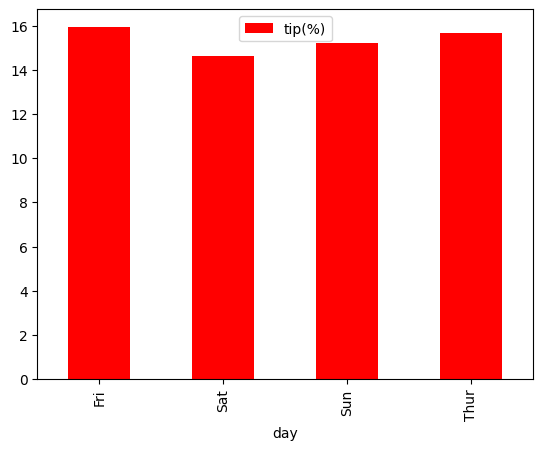

In [21]:
#barplot of analysis
fig, ax = plt.subplots()
tipsPc.plot(kind="bar", x="day", y="tip(%)", color="red", ax=ax)
#the axis corresponding to the columns in our df

In [25]:
#pie plot
#number of records of the waiter per day
#how many data values were there on fri, sat, sun etc
#ie 19/sum(days)
days = pd.DataFrame(tipsData["day"].value_counts())
days.reset_index(inplace=True)
days

,index,day
0,Sat,87
1,Sun,76
2,Thur,62
3,Fri,19


<AxesSubplot: ylabel='day'>

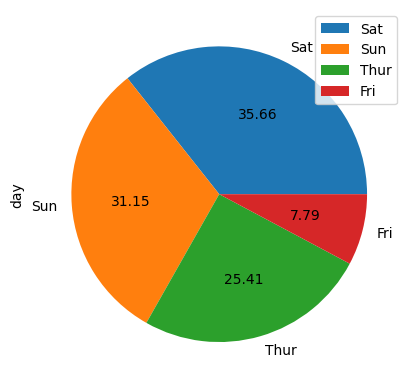

In [24]:
fig, ax = plt.subplots()
days.plot(kind="pie", y="day", labels=days["index"], autopct="%1.2f", ax=ax)
#f turns into a string, .2 is 2 decimal places
#thurs made up 25% of all visits within the week

array([<AxesSubplot: title={'center': 'total_bill'}>], dtype=object)

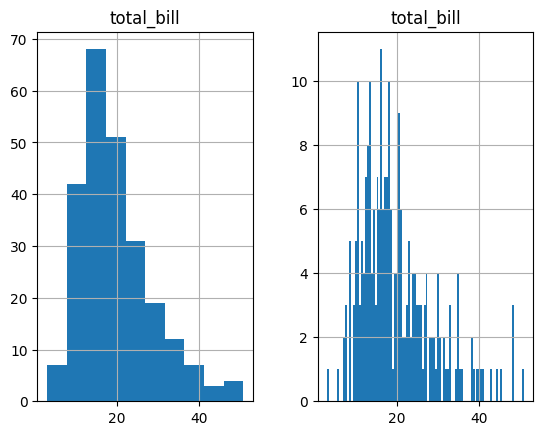

In [26]:
#histogram
#distribution of total bills
fig, ax = plt.subplots(1,2)
tipsData.hist(column="total_bill", ax=ax[0])
tipsData.hist(column="total_bill", bins=100, ax=ax[1])

In [29]:
#pivot table
#table that shows the total bill of male and female based separated by their smoking habits
table = pd.DataFrame(pd.pivot_table(tipsData, index=["sex", "smoker"], aggfunc=np.sum)["total_bill"])
table

C:\Users\yvoyw\AppData\Local\Temp\ipykernel_11856\2286831093.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  table = pd.DataFrame(pd.pivot_table(tipsData, index=["sex", "smoker"], aggfunc=np.sum)["total_bill"])


total_bill
sex    smoker            
Female No          977.68
       Yes         593.27
Male   No         1919.75
       Yes        1337.07